In [177]:
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import re
import pandas as pd
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, lars_path
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import seaborn as sns
%matplotlib inline

sns.set()

In [293]:
# Obtain list of matches
url = 'https://gol.gg/teams/team-matchlist/1151/split-Spring/tournament-ALL/'
url2 = 'https://gol.gg/teams/team-matchlist/891/split-ALL/tournament-ALL/'

response = requests.get(url)
response2 = requests.get(url2)
response.status_code
response2.status_code

200

In [294]:
page = response.text
page2 = response2.text
soup = BeautifulSoup(page, 'lxml')
soup2 = BeautifulSoup(page2, 'lxml')

In [298]:
div = soup.find('div', class_="row rowbreak fond-main-cadre")
reftable = div.find('tbody')
reftable.find_all('td')[-4].find('a')['href']

div2 = soup2.find('div', class_='row rowbreak fond-main-cadre')
rt = div2.find('tbody')
rt.find_all('td')[-4].find('a')['href']

'../game/stats/20718/page-game/'

In [299]:
linkrows = reftable.find_all('tr')
links_ = []
for row in linkrows:
    links_.append(row.find_all('td')[-4].find('a')['href'].replace('..','https://gol.gg'))
    
lrows = rt.find_all('tr')
links2_ = []
for row in lrows:
    links2_.append(row.find_all('td')[-4].find('a')['href'].replace('..','https://gol.gg'))

In [304]:
links = []
for link in links_:
    new = link.replace('page-game', 'page-fullstats')
    links.append(new)
    
links2 = []
for link in links2_:
    new = link.replace('page-game','page-fullstats')
    links2.append(new)

In [7]:
def make_tables(link):
    chromedriver = 'chromedriver'
    os.environ['webdriver.chrome.driver'] = chromedriver
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(chromedriver, chrome_options=options)
    
    driver.get(link)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    table = soup.find('tbody')
    columns = table.find_all('tr')
    dict_ = {}
    
    for col in columns:
        trs = col.find_all('td')
        key = trs[0].text
        values = []
        for i in range(1, 11):
            if trs[i].find('b'):
                values.append(trs[i].find('b').text)
            else:
                values.append(trs[i].text)
        dict_[key] = values
        
    df = pd.DataFrame(dict_)
    
    #for col in columns:
    #trs = col.find_all('td')
    #key = trs[0].text
    #values = []
    #for i in range(1,11):
    #    if trs[i].find('b'):
    #        values.append(trs[i].find('b').text)
    #    else:
    #        values.append(trs[i].text)
    #dict_[key] = values
    
    champs = soup.find('thead').find_all('th')
    Champions = []
    for i in range(1,11):
        text = champs[i].find('img').attrs['alt']
        Champions.append(text)
        
    df['Champions'] = Champions
    
    driver.close()
    
    return df
    
    

In [306]:
chromedriver = 'chromedriver'
chrome_options = Options()
chrome_options.add_argument('--headless')
os.environ['webdriver.chrome.driver'] = chromedriver
driver = webdriver.Chrome(chromedriver, options = chrome_options)
print('done')

done


In [18]:
driver.get(links[0])
soup = BeautifulSoup(driver.page_source, 'html.parser')
table = soup.find('tbody')
columns = table.find_all('tr')
colnames = []
for col in columns:
    colnames.append(col.find('td').text)

In [19]:
champs = soup.find('thead').find_all('th')
champs[1].find('img').attrs['alt']
Champions = []
for i in range(1,11):
    text = champs[i].find('img').attrs['alt']
    Champions.append(text)

#Champions

In [17]:
dict_ = {}
for col in columns:
    trs = col.find_all('td')
    key = trs[0].text
    values = []
    for i in range(1,11):
        if trs[i].find('b'):
            values.append(trs[i].find('b').text)
        else:
            values.append(trs[i].text)
    dict_[key] = values

In [14]:
#pd.DataFrame(dict_)

In [307]:
big_df = pd.DataFrame()
for link in links:
    table = make_tables(link)
    big_df = big_df.append(table, ignore_index=True)
    
for link in links2:
    table = make_tables(link)
    big_df = big_df.append(table, ignore_index=True)

<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning

<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning

<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)
<ipython-input-7-a21c838062ac>:6: DeprecationWarning

In [308]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Player                    1140 non-null   object
 1   Role                      1140 non-null   object
 2   Kills                     1140 non-null   object
 3   Deaths                    1140 non-null   object
 4   Assists                   1140 non-null   object
 5   KDA                       1140 non-null   object
 6   CS                        1140 non-null   object
 7   CS in Team's Jungle       1140 non-null   object
 8   CS in Enemy Jungle        1140 non-null   object
 9   CSM                       1140 non-null   object
 10  Golds                     1140 non-null   object
 11  GPM                       1140 non-null   object
 12  GOLD%                     1140 non-null   object
 13  Vision Score              1140 non-null   object
 14  Wards placed            

In [349]:
big_df.to_csv(r'data/match_data.csv')

In [388]:
df_ = pd.read_csv(r'data/match_data.csv')
df_.head(1).T

,0
Unnamed: 0,0
Player,Wunder
Role,TOP
Kills,1
Deaths,2
Assists,4
KDA,2.5
CS,223
CS in Team's Jungle,0
CS in Enemy Jungle,0


In [351]:
colnames = ['Unnamed: 0','Kills','Golds', 'Player', 'Role',
           'KDA',
           'GOLD%','VS%','DMG%','KP%','Solo kills','Double kills',
           'Triple kills','Quadra kills','Penta kills','GD@15',
            'Champions','Physical Damage','Magic Damage',
           'True Damage','GPM','K+A Per Minute']

X = df_.drop(columns=colnames)
y = df_['GD@15']
X['DMG Ratio'] = X['Total damage to Champion'] / X['Total damage taken']
X = X.dropna()
y = y.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1139
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Deaths                    1120 non-null   int64  
 1   Assists                   1120 non-null   int64  
 2   CS                        1120 non-null   int64  
 3   CS in Team's Jungle       1120 non-null   float64
 4   CS in Enemy Jungle        1120 non-null   float64
 5   CSM                       1120 non-null   float64
 6   Vision Score              1120 non-null   float64
 7   Wards placed              1120 non-null   float64
 8   Wards destroyed           1120 non-null   float64
 9   Control Wards Purchased   1120 non-null   float64
 10  VSPM                      1120 non-null   float64
 11  WPM                       1120 non-null   float64
 12  VWPM                      1120 non-null   float64
 13  WCPM                      1120 non-null   float64
 14  Total da

In [353]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Deaths,1120.0,3.041071,1.989272,0.000000,1.000000,3.000000,4.000000,10.00000
Assists,1120.0,6.786607,4.332474,0.000000,3.000000,6.000000,10.000000,26.00000
CS,1120.0,209.016071,108.594892,12.000000,146.500000,224.000000,282.000000,561.00000
CS in Team's Jungle,1120.0,28.635714,38.270209,0.000000,1.000000,13.000000,33.000000,169.00000
CS in Enemy Jungle,1120.0,4.234821,7.193809,0.000000,0.000000,0.000000,5.000000,54.00000
CSM,1120.0,6.365357,3.059145,0.400000,4.875000,7.200000,8.700000,11.70000
Vision Score,1120.0,49.610714,28.919232,3.000000,29.000000,40.000000,64.000000,184.00000
Wards placed,1120.0,22.731250,19.087075,2.000000,11.000000,14.000000,24.250000,99.00000
Wards destroyed,1120.0,9.611607,6.582130,0.000000,5.000000,8.000000,13.000000,53.00000
Control Wards Purchased,1120.0,8.561607,6.270756,0.000000,4.000000,6.000000,11.000000,36.00000


In [354]:
X, test_X, y, test_y = train_test_split(X, y, test_size = .2)
#X_df.describe().T
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .2)

In [355]:
scaler = StandardScaler()

train_Xscaled = scaler.fit_transform(train_X.values)
val_Xscaled = scaler.fit_transform(val_X.values)
test_Xscaled = scaler.fit_transform(test_X.values)


In [356]:
ridge = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2)

train_Xpoly = poly.fit_transform(train_X.values)
val_Xpoly = poly.fit_transform(val_X.values)
test_Xpoly = poly.fit_transform(test_X.values)

In [357]:
lr = LinearRegression()
lr_poly = LinearRegression()

lr.fit(train_X, train_y)
ridge.fit(train_Xscaled, train_y)
lr_poly.fit(train_Xpoly, train_y)

LinearRegression()

In [358]:
print(f'Lin. Reg: {lr.score(val_X, val_y):.3f}')
print(f'Ridge: {ridge.score(val_Xscaled, val_y):.3f}')
print(f'Poly: {lr_poly.score(val_Xpoly, val_y):.3f}')

Lin. Reg: 0.529
Ridge: 0.540
Poly: -0.260


In [398]:
kf = KFold(n_splits=5, shuffle=True, random_state=97)
cv_lrscores, cv_ridgescores = [], []
X_np, y_np = np.array(X), np.array(y)

for tr, val in kf.split(X_np,y_np):
    X_train, y_train = X_np[tr], y_np[tr]
    X_val, y_val = X_np[val], y_np[val]
    
    lr = LinearRegression()
    ridge = Ridge(alpha=1)
    
    lr.fit(X_train, y_train)
    cv_lrscores.append(lr.score(X_val, y_val))
    
    scaler = StandardScaler()
    X_trainSc = scaler.fit_transform(X_train)
    X_valSc = scaler.transform(X_val)
    
    ridge.fit(X_trainSc, y_train)
    cv_ridgescores.append(ridge.score(X_valSc, y_val))
    
print(f'Lin Reg mean score: {np.mean(cv_lrscores):.3f} +- {np.std(cv_lrscores):.3f}')
print(f'Ridge mean score: {np.mean(cv_ridgescores):.3f} +- {np.std(cv_ridgescores):.3f}')

Lin Reg mean score: 0.462 +- 0.026
Ridge mean score: 0.464 +- 0.026


Ridge score: 0.558


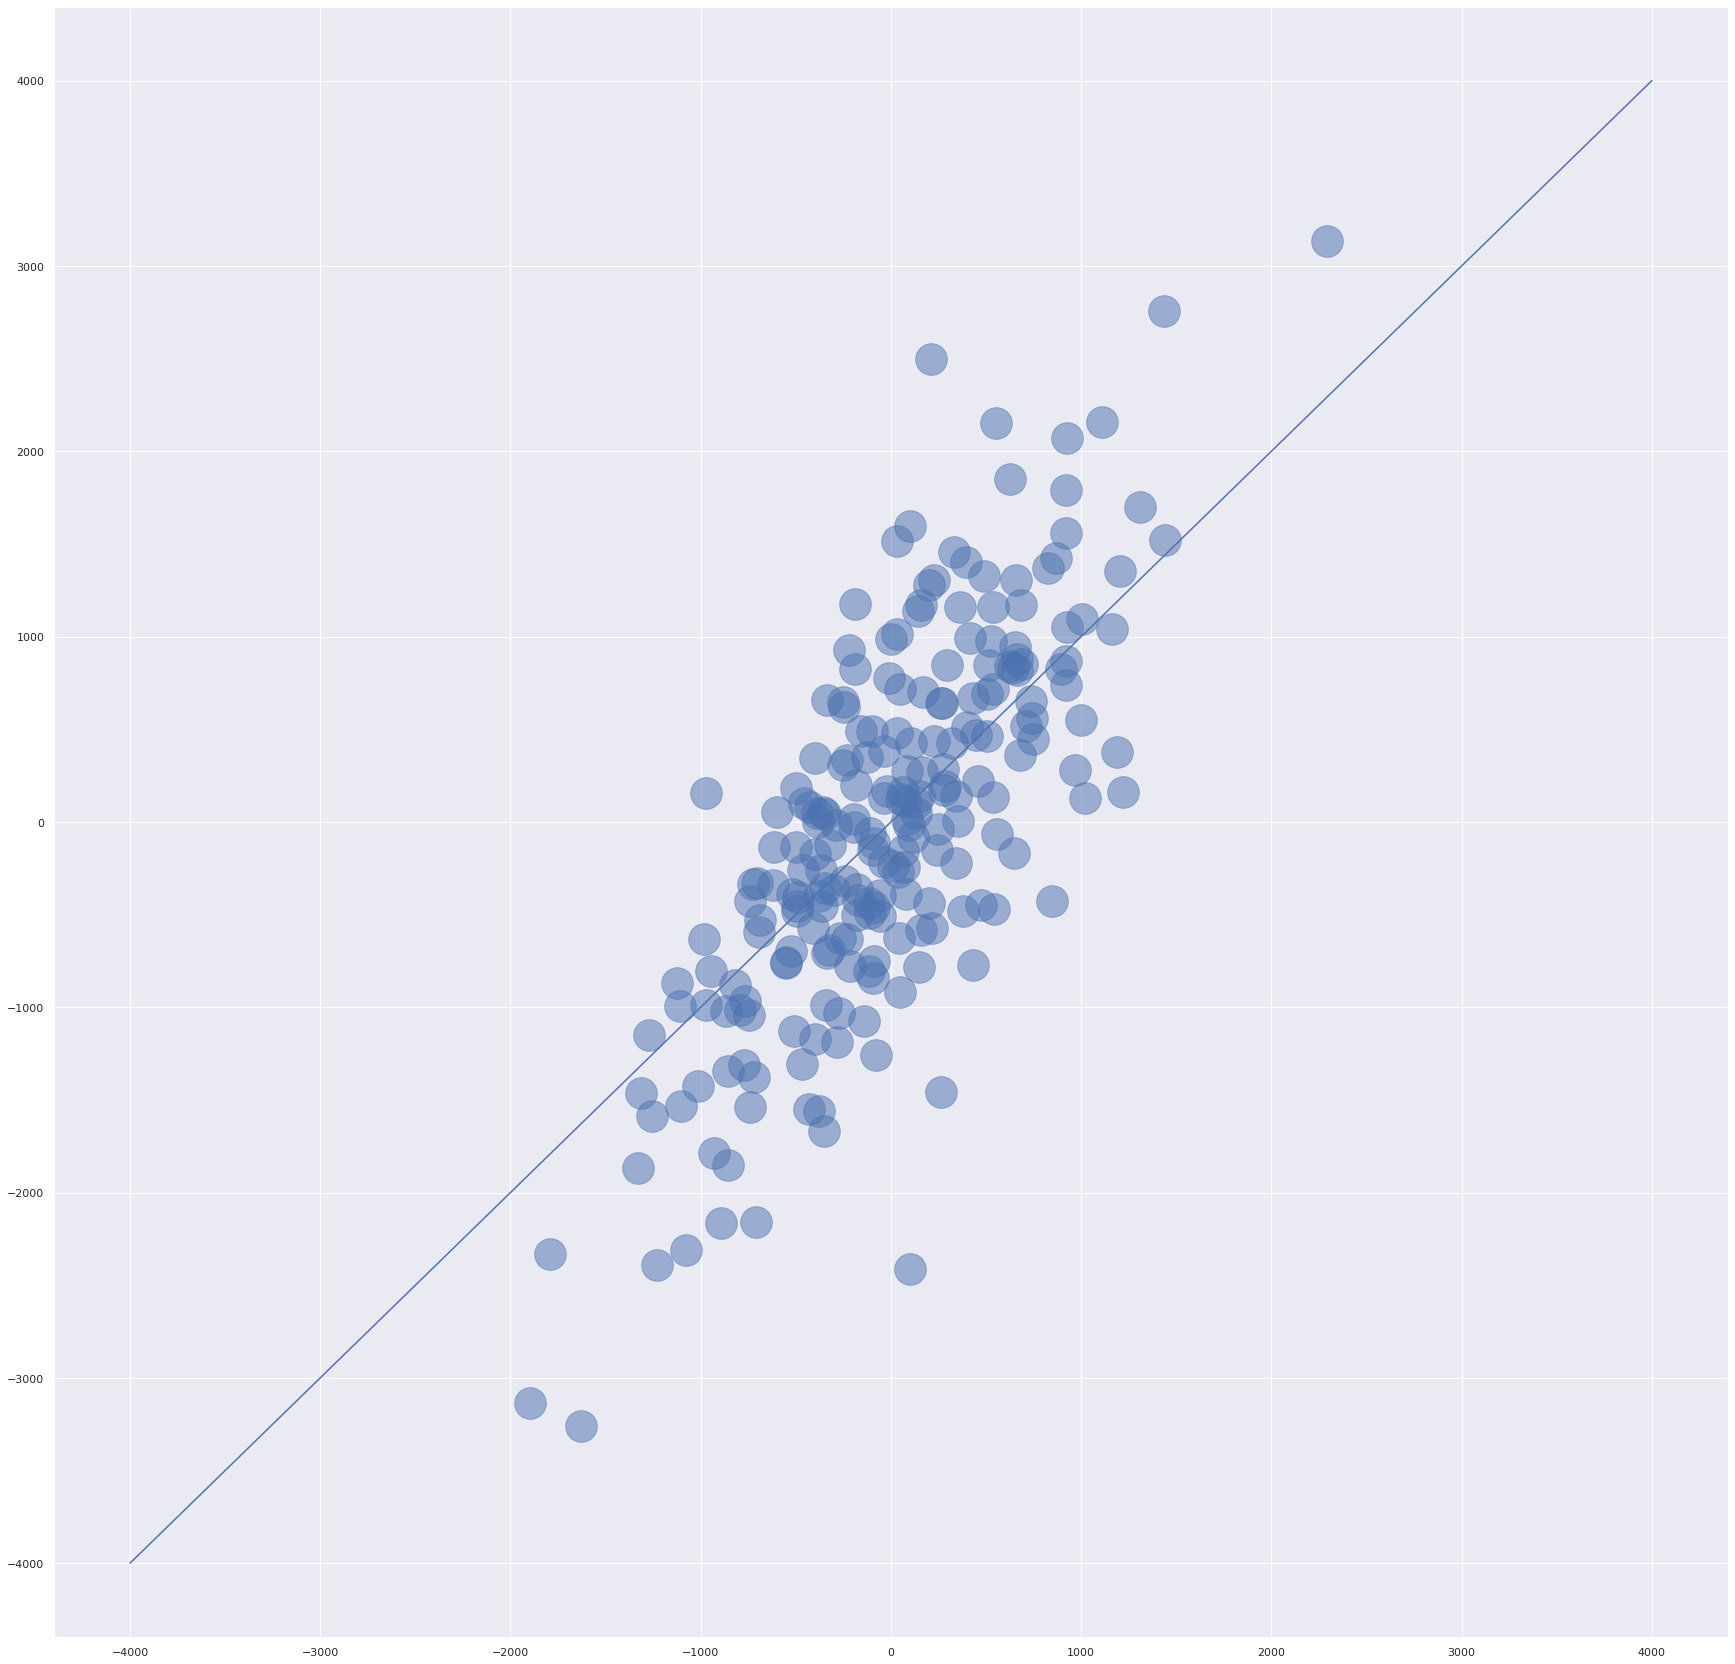

In [395]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_test_sc = scaler.transform(test_X)

ridge = Ridge(alpha=1)
ridge.fit(X_sc, y)
print(f'Ridge score: {ridge.score(X_test_sc, test_y):.3f}')
predictions = ridge.predict(X_test_sc)
plt.scatter(predictions, test_y, s = 1000, alpha=.5)
plt.plot(np.linspace(-4000,4000), np.linspace(-4000,4000))

In [361]:
lr = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

kf = KFold(n_splits=5, shuffle=True, random_state=97)
print(np.mean(cross_val_score(lr, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(ridge, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lasso, X, y, cv=kf, scoring='r2')))

0.46204444925420657
0.4626722592885016
0.46132036476328453


/home/syedaslam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116458499.73667368, tolerance: 52724.77629762571
  model = cd_fast.enet_coordinate_descent(
/home/syedaslam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6403045.183438361, tolerance: 55899.588647698736
  model = cd_fast.enet_coordinate_descent(
/home/syedaslam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95070889.9750674, tolerance: 54546.52127977685
  model = cd_fast.enet_coordinate_descent(
/home/syedaslam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

In [334]:
std = StandardScaler()
std.fit(train_X.values)

StandardScaler()

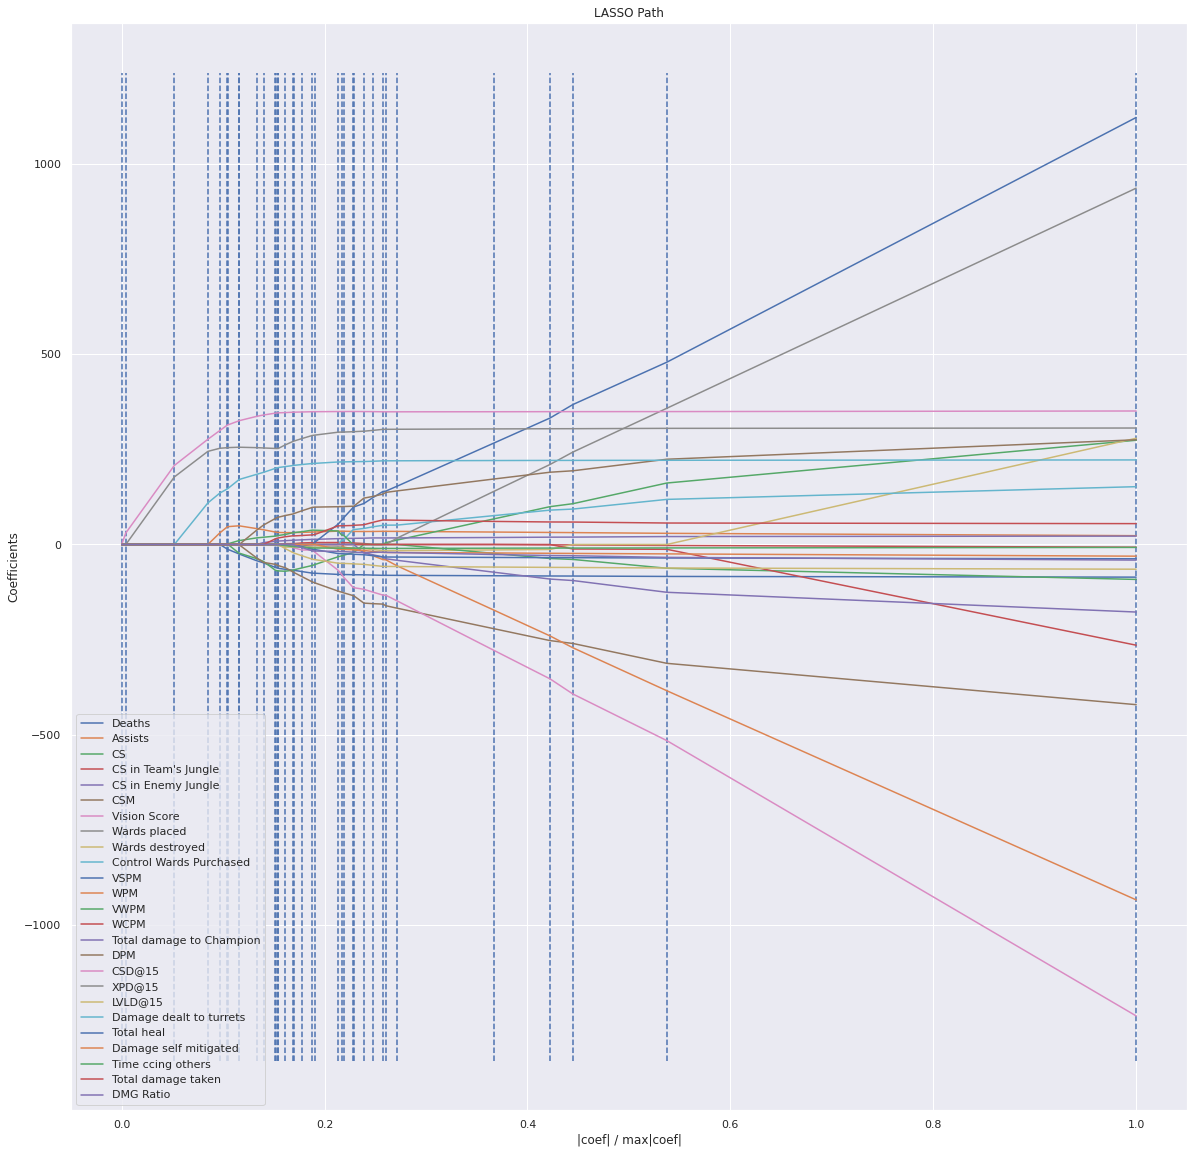

In [335]:
X_tr = std.transform(train_X.values)
alphas, _, coefs = lars_path(X_tr, train_y.values, method='lasso')

xx = np.sum(np.abs(coefs.T),axis=1)
xx /= xx[-1]

plt.figure(figsize=(20,20))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(train_X.columns)
plt.show()

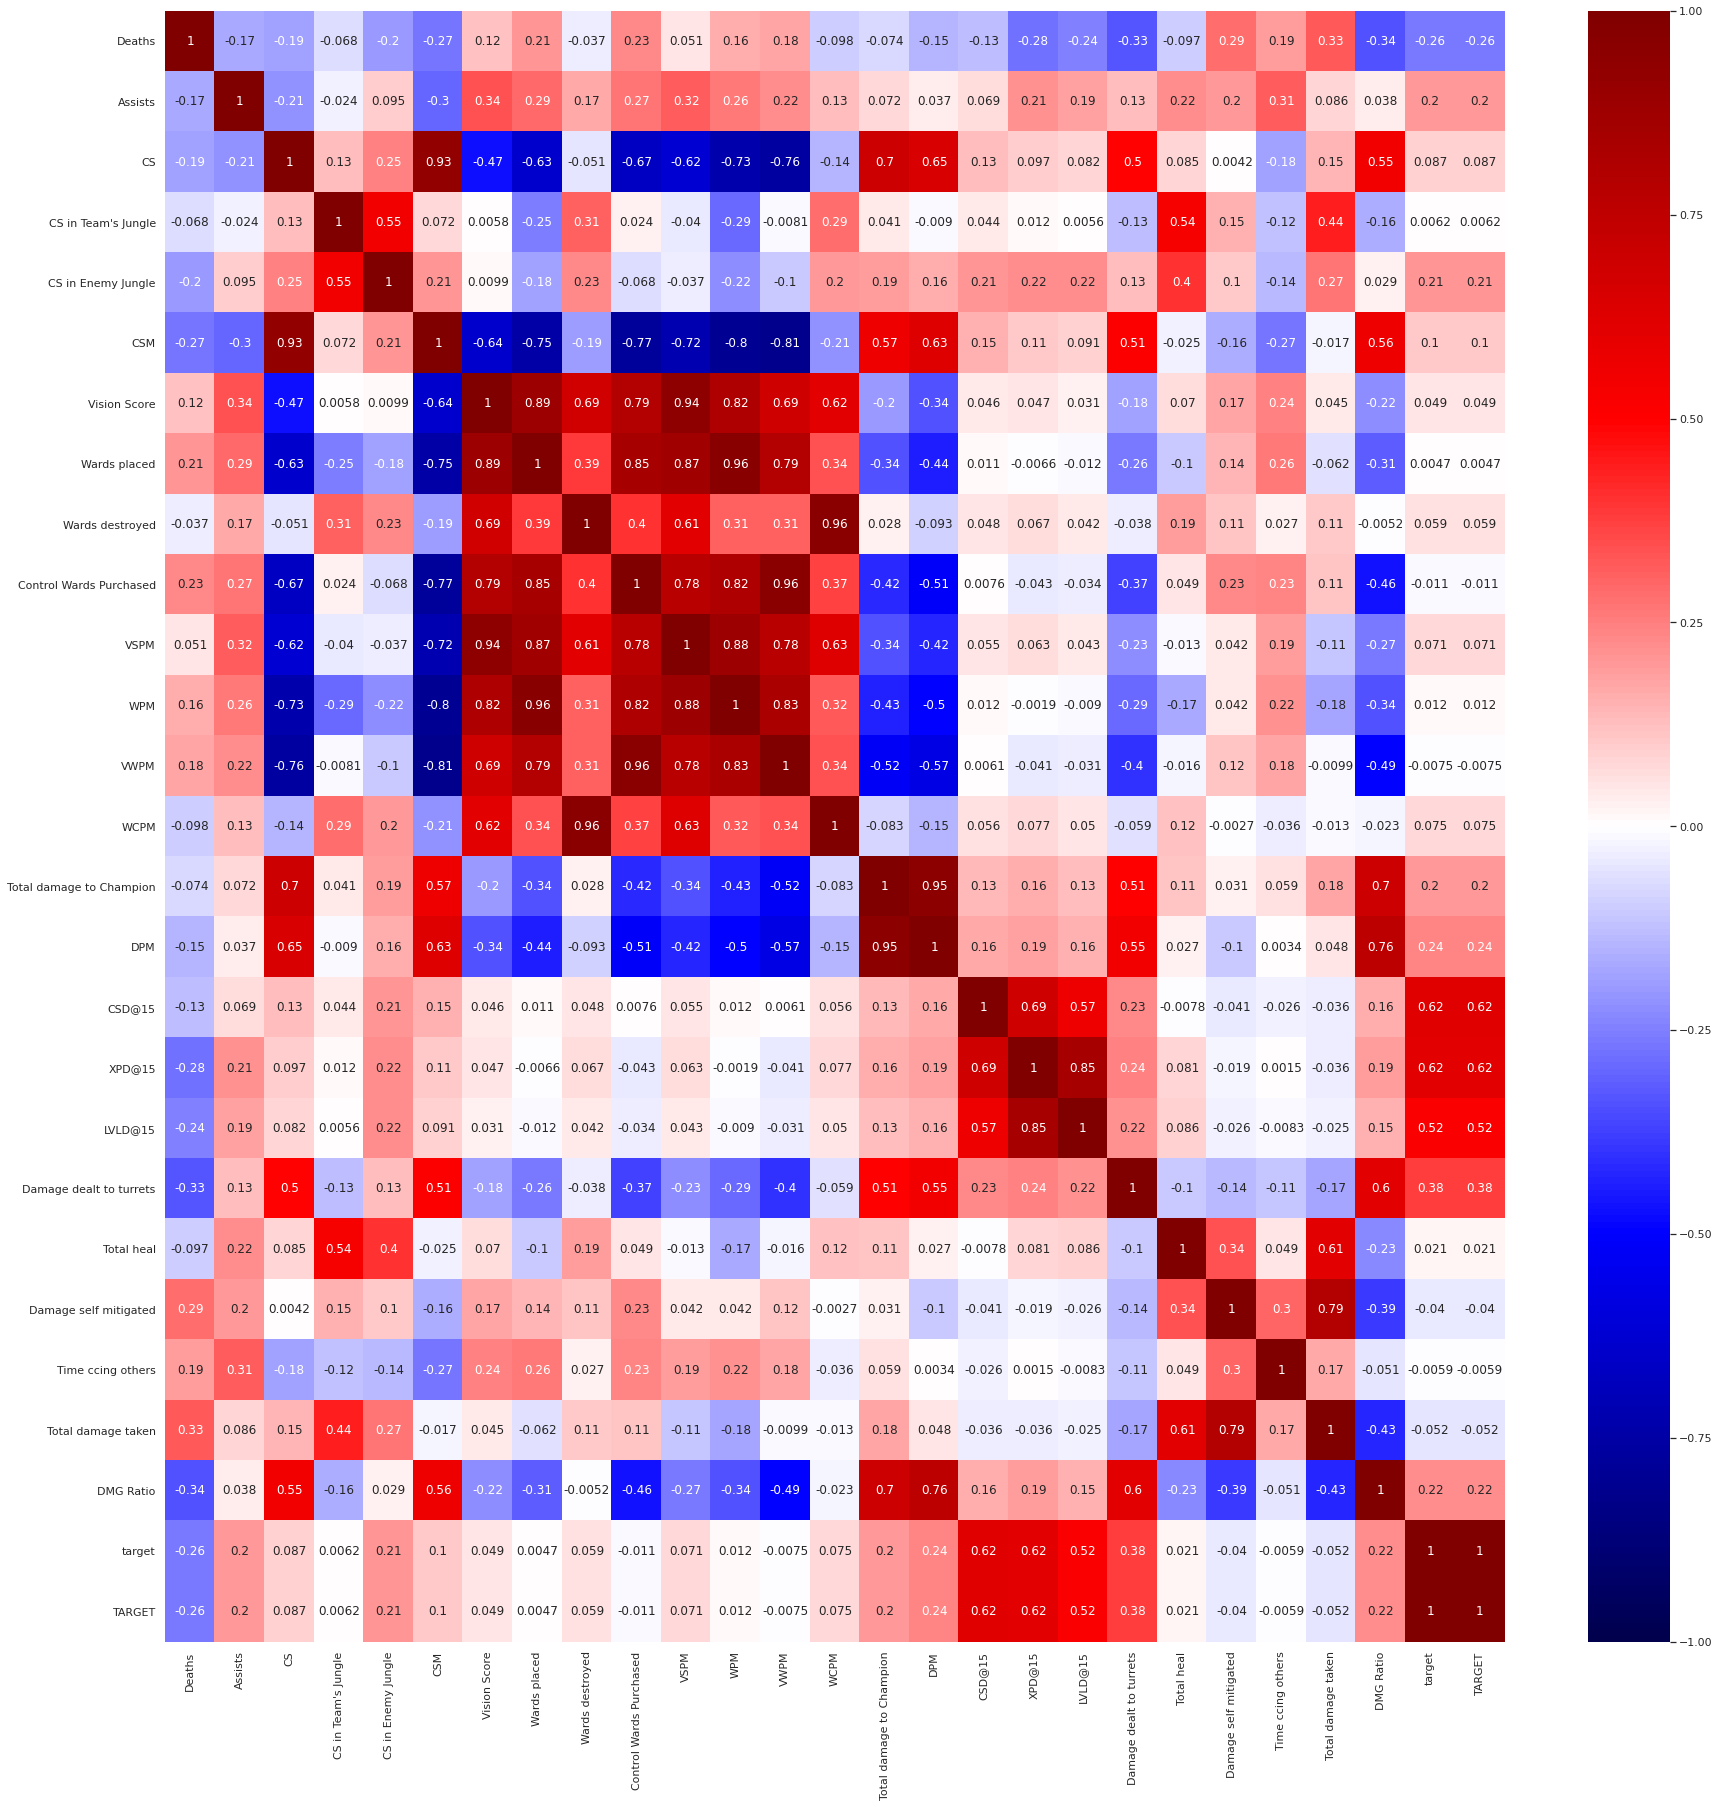

In [346]:
Xcorr = X
Xcorr['TARGET'] = y
corrmap = sns.heatmap(Xcorr.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

sns.set(rc={'figure.figsize':(30,30)})

fig = corrmap.get_figure()
fig.savefig('resources/heatmap.png')

In [166]:
url = 'https://gol.gg/teams/team-matchlist/891/split-ALL/tournament-ALL/'
chromedriver = 'chromedriver'
os.environ['webdriver.chrome.driver'] = chromedriver
options = Options()
#options.add_argument('--headless')
driver = webdriver.Chrome(chromedriver, chrome_options=options)

driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.close()

<ipython-input-166-b1cbd5ad3b90>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)


In [51]:
table = soup.find_all('tbody')[1]
rows = table.find_all('tr')
rows[0]

<tr><td class="text_defeat text-center footable-visible footable-first-column"><span class="footable-toggle"></span>LOSS</td><td class="text-center text_defeat" style="display: none;">1-3</td><td class="text-center text-red footable-visible"><img alt="Red" class="champion_icon_light" src="../_img/redside-icon.png"/></td><td class="text-center footable-visible">2</td><td class="text-center footable-visible">28.6</td><td class="text-center footable-visible">1</td><td class="text-center footable-visible">0</td><td class="text-center footable-visible"><a class="white_link" href="./team-stats/849/split-ALL/tournament-World%20Championship%202020/" title="DWG stats">DWG</a></td><td class="text-center footable-visible">15</td><td class="text-center footable-visible">40.1</td><td class="text-center footable-visible">7</td><td class="text-center footable-visible">3</td><td class="text-center footable-visible">19:03</td><td class="text-center footable-visible footable-last-column"><a href="../gam

In [52]:
G2_match_hists = ['https://gol.gg/teams/team-matchlist/145/split-ALL/tournament-ALL/',
                 'https://gol.gg/teams/team-matchlist/248/split-ALL/tournament-ALL/',
                 'https://gol.gg/teams/team-matchlist/400/split-ALL/tournament-ALL/',
                 'https://gol.gg/teams/team-matchlist/625/split-ALL/tournament-ALL/',
                 'https://gol.gg/teams/team-matchlist/891/split-ALL/tournament-ALL/',
                 'https://gol.gg/teams/team-matchlist/1151/split-ALL/tournament-ALL/']

In [56]:
url = 'https://gol.gg/teams/team-matchlist/891/split-ALL/tournament-ALL/'
chromedriver = 'chromedriver'
os.environ['webdriver.chrome.driver'] = chromedriver
options = Options()
options.add_argument('--headless')
driver = webdriver.Chrome(chromedriver, chrome_options=options)

driver.get(G2_match_hists[0])
soup = BeautifulSoup(driver.page_source, 'html.parser')

table = soup.find_all('tbody')[1]
rows = table.find_all('tr')

<ipython-input-56-b7497cb23fa4>:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=options)


'WIN'

In [104]:
prelim = {}
wins = []
gold1 = []
gold2 = []

for link in G2_match_hists:
    driver.get(link)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    table = soup.find_all('tbody')[1]
    rows = table.find_all('tr')
    
    for row in rows:
        ds = row.find_all('td')
        wins.append(ds[0].text)
        gold1.append(ds[4].text)
        gold2.append(ds[9].text)
        
    

#for row in rows:
#    ds = row.find_all('td')
#    wins.append(ds[])
#    
#rows[0].find_all('td')[0].text
#for row in rows:
#    ds = row.find_all('td')
#    wins.append(ds[0].text)
#    gold1.append(ds[4].text)
#    gold2.append(ds[9].text)
    

#corr_df = pd.DataFrame(prelim)
#corr_df.to_csv(r'data/correlation_data.csv')



504

In [113]:
prelim['W/L'] = wins
prelim['TeamGold'] = gold1
prelim['OppGold'] = gold2

corr_df = pd.DataFrame(prelim)
corr_df.to_csv(r'data/correlation_data.csv')

<AxesSubplot:xlabel='W/L', ylabel='GoldDiff'>

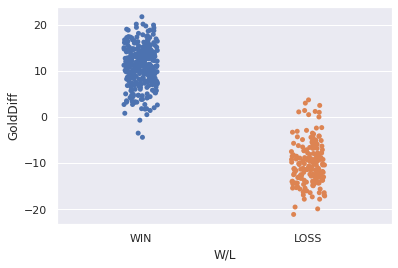

In [116]:
relations = pd.read_csv(r'data/correlation_data.csv')

winbool = []
for w in relations['W/L']:
    if w == 'WIN':
        winbool.append(1)
    else:
        winbool.append(0)
        
relations['WINS'] = winbool
relations['GoldDiff'] = relations['TeamGold'] - relations['OppGold']
#sns.jointplot(x='relations.')
sns.stripplot(data=relations, y='GoldDiff', x='W/L')

In [117]:
relations.describe()

,Unnamed: 0,TeamGold,OppGold,WINS,GoldDiff
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,251.500000,63.277976,59.806548,0.644841,3.471429
std,145.636534,13.164053,14.901701,0.479037,11.022773
min,0.000000,28.600000,25.100000,0.000000,-21.100000
25%,125.750000,53.875000,49.000000,0.000000,-8.400000
50%,251.500000,62.300000,58.700000,1.000000,7.600000
75%,377.250000,71.125000,69.300000,1.000000,12.625000
max,503.000000,114.700000,131.600000,1.000000,21.700000
